# Training Model

## Linear Regression

### The Normal equation

<span style="font-size: 1.2rem">$\hat{\theta} = (X^{T} . X)^{-1} . X^{T} . y = X^{+} . y$</span>
* $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function.
* y is vector of target values.
* $X^{+}$ is pseudoinverse of X

In [1]:
import numpy as np

np.random.seed(42)
num_instances = 100
X = 2 * np.random.rand(num_instances, 1)
y = 3*X + 4 + np.random.randn(num_instances, 1)

In [2]:
X[:2], y[:2]

(array([[0.74908024],
        [1.90142861]]),
 array([[6.33428778],
        [9.40527849]]))

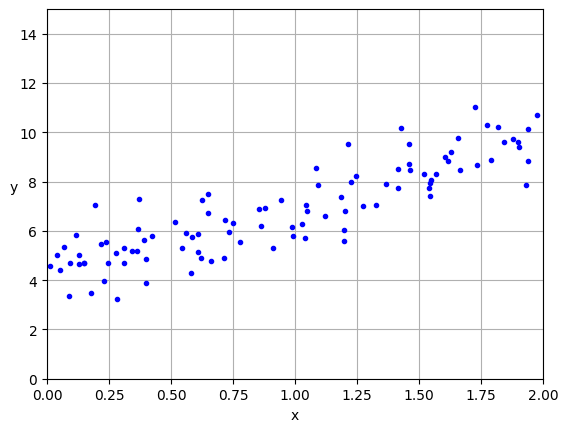

In [3]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.grid()
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)

In [5]:
X[:2], X_b[:2]

(array([[0.74908024],
        [1.90142861]]),
 array([[1.        , 0.74908024],
        [1.        , 1.90142861]]))

In [6]:
best_theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
best_theta

array([[4.21509616],
       [2.77011339]])

**NOTE**: pseudoinverse

In [7]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

In [8]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
X_new_b

array([[1., 0.],
       [1., 2.]])

In [9]:
y_new_pred = X_new_b @ best_theta
y_new_pred

array([[4.21509616],
       [9.75532293]])

In [10]:
y_pred = X_b @ best_theta
y_pred[:2]

array([[6.29013335],
       [9.48226901]])

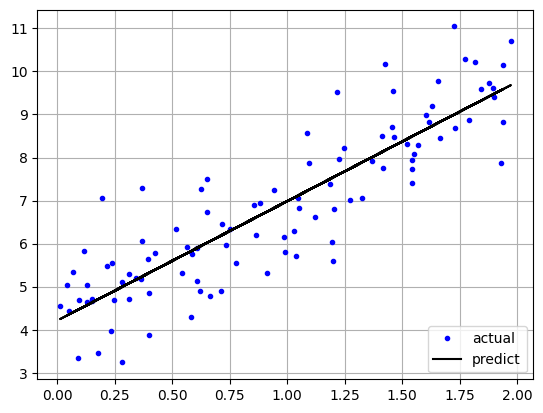

In [11]:
plt.plot(X, y, 'b.', label='actual')
plt.plot(X, y_pred, 'k-', label='predict')

plt.legend(loc='lower right')
plt.grid()
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [13]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [14]:
best_theta

array([[4.21509616],
       [2.77011339]])

In [15]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

### Computational Complexity

* Both the Normal equation and the SVD approach get very slow
when the number of features grows large (e.g., 100,000). On the
positive side, both are linear with regard to the number of instances
in the training set (they are O(m)), so they handle large training
sets efficiently, provided they can fit in memory
* Also, once you have trained your linear regression model (using the Normal equation
or any other algorithm), predictions are very fast: the computational complexity is
linear with regard to both the number of instances you want to make predictions on
and the number of features. In other words, making predictions on twice as many
instances (or twice as many features) will take roughly twice as much time.
* Now we will look at a very different way to train a linear regression model, which is
better suited for cases where there are a large number of features or too many training
instances to fit in memory

## Gradient Descent

<img src='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*XntrQhkSlmxC6QejBjEbww.png' style='width: 50%'/>

* When using gradient descent, you should ensure that all features
have a similar scale (e.g., using Scikit-Learn’s StandardScaler
class), or else it will take much longer to converge.
* Standardization (Z-score):
Subtracts the mean and divides by the standard deviation of each feature, resulting in a distribution with a mean of 0 and standard deviation of 1. 
* Min-Max scaling:
Scales features to a range between 0 and 1 by subtracting the minimum value and dividing by the range of the feature. 


### Batch Gradient Descent

### Stachostic Gradient Descent

### Mini Batch Gradient Descent

## Polynomial Regression

What if your data is more complex than a straight line? Surprisingly, you can use a
linear model to fit nonlinear data. A simple way to do this is to add powers of each
feature as new features, then train a linear model on this extended set of features. This
technique is called polynomial regression.


In [57]:
import numpy as np

np.random.seed(42)
num_instances = 100
X = 6 * np.random.rand(num_instances, 1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(num_instances, 1)

In [58]:
X[:2], y[:2]

(array([[-0.75275929],
        [ 2.70428584]]),
 array([[1.61761105],
        [8.06185944]]))

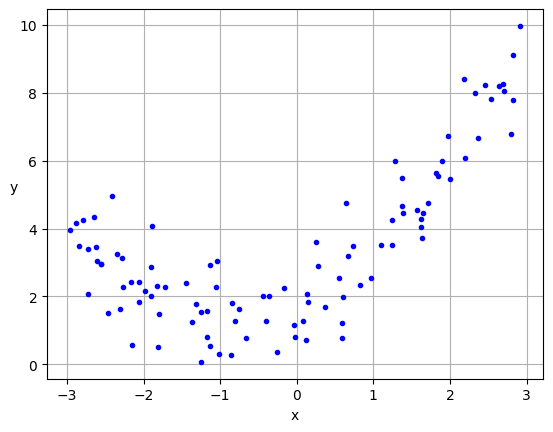

In [59]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.grid()
plt.show()

In [60]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [61]:
X_poly = poly_features.fit_transform(X)

In [62]:
X_poly[:2]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ]])

In [63]:
(-0.75275929) ** 2

0.566646548681304

In [64]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [65]:
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [66]:
X_new = np.linspace(-3, 3, num=num_instances).reshape(num_instances, 1)
X_new_poly = poly_features.transform(X_new)
y_new_pred = lin_reg.predict(X_new_poly)

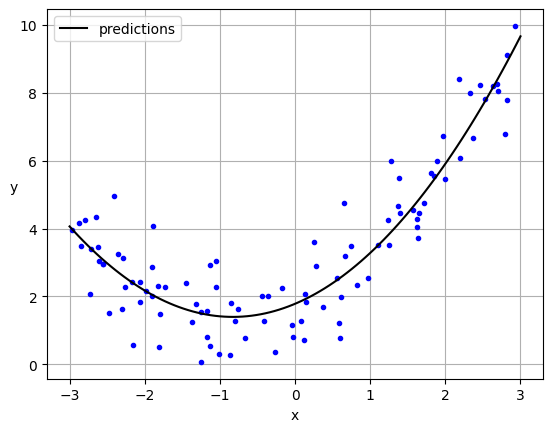

In [67]:
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new_pred, 'k-', label='predictions')

plt.legend(loc='upper left')
plt.grid()
plt.xlabel('x')
plt.ylabel('y', rotation=0)

plt.show()

* Note that when there are multiple features, polynomial regression is capable of
finding relationships between features, which is something a plain linear regression
model cannot do. This is made possible by the fact that PolynomialFeatures also
adds all combinations of features up to the given degree. For example, if there were
two features a and b, PolynomialFeatures with degree=3 would not only add the
features $a^{2}$, $a^{3}$, $b^{2}$, $b^{3}$, but also the combinations $ab$, $a^{2}b$, $ab^{2}$.
* PolynomialFeatures(degree=d) transforms an array containing n
features into an array containing $(n + d)! / d!n!$ features, where $n!$
is the factorial of n, equal to $1 × 2 × 3 × ⋯ × n$. Beware of the
combinatorial explosion of the number of features!

## Learning Curves

* This high-degree polynomial regression model is severely overfitting the training
data, while the linear model is underfitting it. The model that will generalize best in
this case is the quadratic model, which makes sense because the data was generated
using a quadratic model. But in general you won’t know what function generated the
data, so how can you decide how complex your model should be? How can you tell
that your model is overfitting or underfitting the data?
    * Cross-validation
    * Learning curve